In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [29]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [31]:
df.describe().round(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [32]:
df.duplicated().values.any()

False

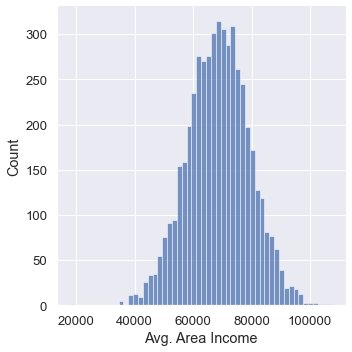

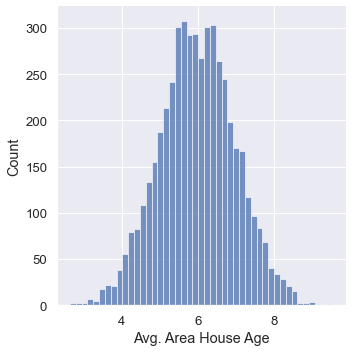

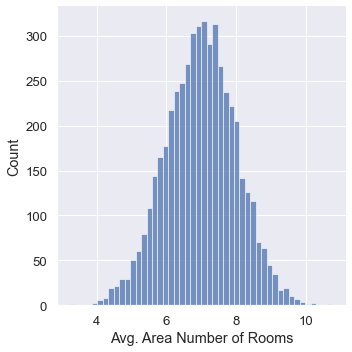

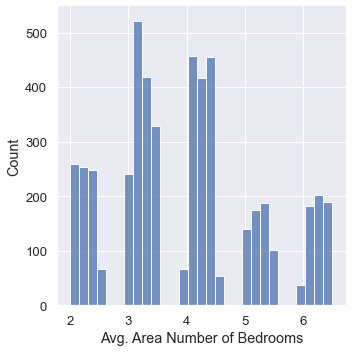

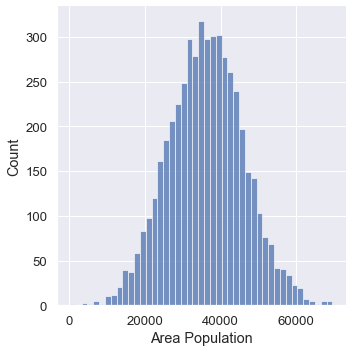

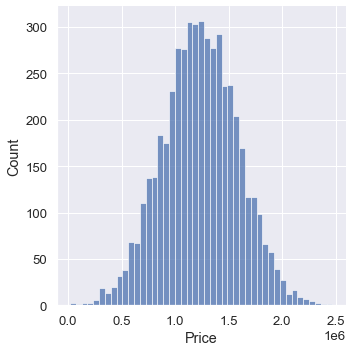

In [33]:
for col in df.select_dtypes(float):
    sns.displot(df[col])
    plt.show()

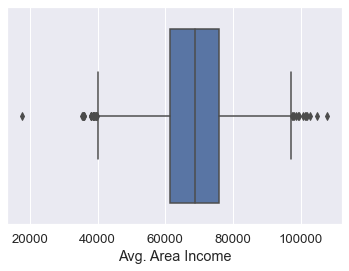

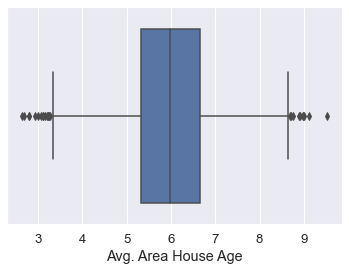

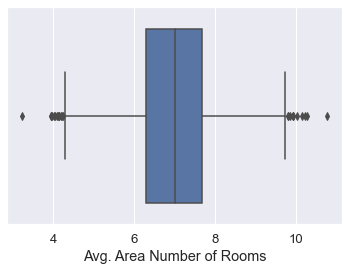

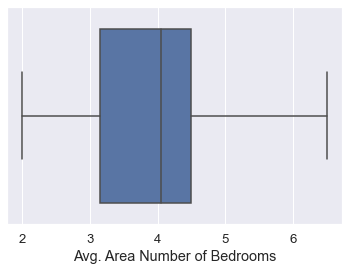

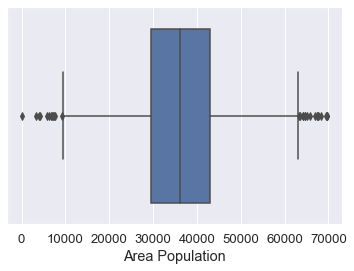

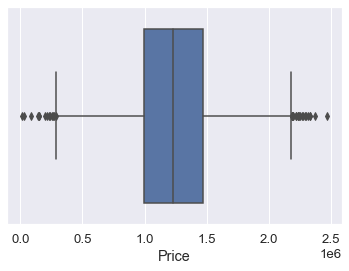

In [34]:
for col in df.select_dtypes(float):
    sns.boxplot(df[col])
    plt.show()

In [36]:
df.shape

(5000, 7)

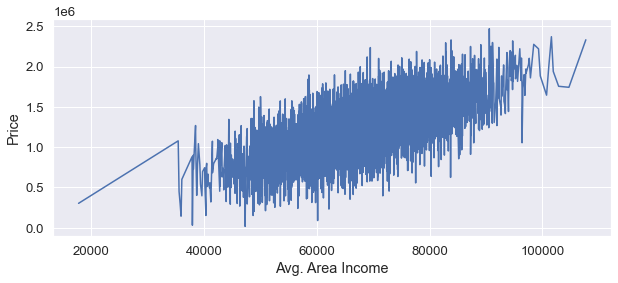

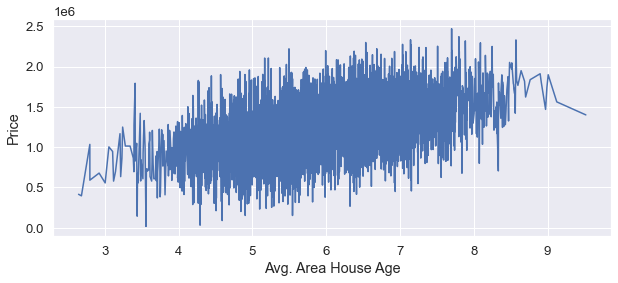

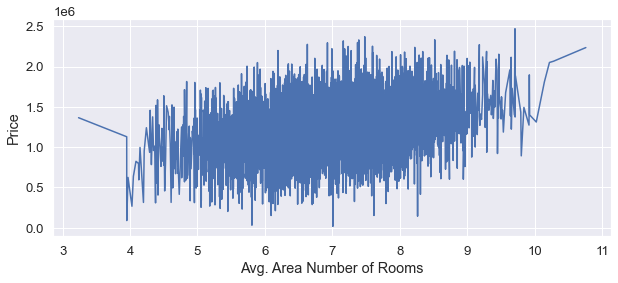

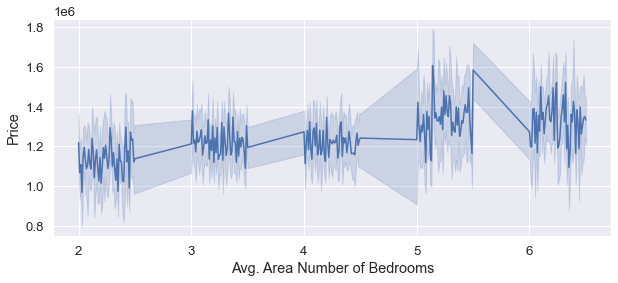

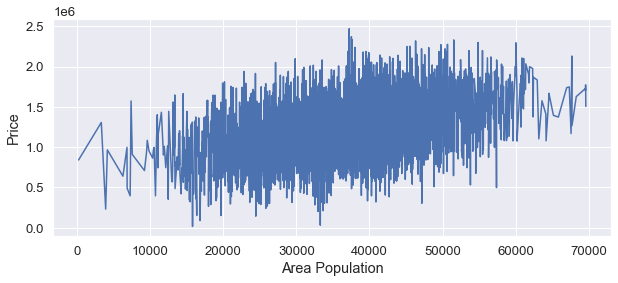

In [40]:
for col in df.select_dtypes(float):
    if col !='Price':
        plt.figure(figsize=(10,4))
        sns.lineplot(x=df[col], y=df['Price'])
        plt.show()

<AxesSubplot:>

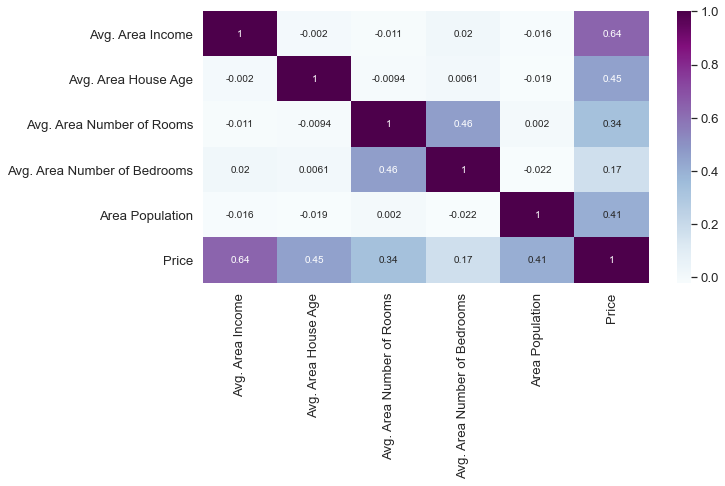

In [49]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')

In [110]:
x = df.drop(columns=['Price', 'Address'], axis=1) 
y = df['Price']

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [133]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [134]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [135]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.9087055094937379
Test Score: 0.9132347191321312
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.7211518595269764
------------------------------
Using model: RF
Training Score: 0.9826598984916062
Test Score: 0.8776527061397361
------------------------------
Using model: XGBR
Training Score: 0.9752811536230451
Test Score: 0.8779977559621011
------------------------------
Using model: KNNR
Training Score: 0.9047181827931445
Test Score: 0.8594206647074607
------------------------------
Using model: SVR
Training Score: 0.0008922735717696861
Test Score: -0.00018847103903496532


### linear Regression is the best model because this data is a normal distribution and linear.